Chapter 27
# 主成分分析
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
# pip install pandas_datareader
import seaborn as sns
import statsmodels.multivariate.pca as pca

In [2]:
# 下载数据
df = pdr.data.DataReader(['DGS6MO','DGS1',
                          'DGS2','DGS5',
                          'DGS7','DGS10',
                          'DGS20','DGS30'], 
                          data_source='fred', 
                          start='01-01-2022', 
                          end='12-31-2022')
df = df.dropna()
# 如果无法下载数据，请用pandas.read_csv() 读取配套文件

In [3]:
# 修改数据帧列标签
df = df.rename(columns={'DGS6MO': '0.5 yr', 
                        'DGS1': '1 yr',
                        'DGS2': '2 yr',
                        'DGS5': '5 yr',
                        'DGS7': '7 yr',
                        'DGS10': '10 yr',
                        'DGS20': '20 yr',
                        'DGS30': '30 yr'})

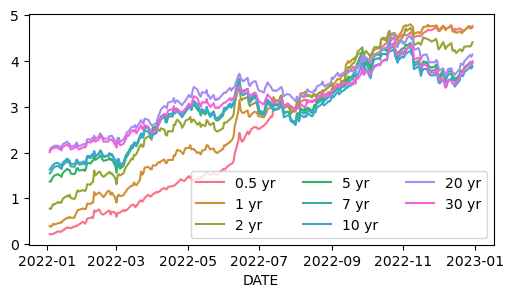

In [4]:
# 绘制利率走势
fig, ax = plt.subplots(figsize = (6,3))
sns.lineplot(df,markers=False,dashes=False,
             palette = "husl",ax = ax)
ax.legend(loc='lower right',ncol=3)

In [5]:
# 计算日收益率
X_df = df.pct_change()
X_df = X_df.dropna()

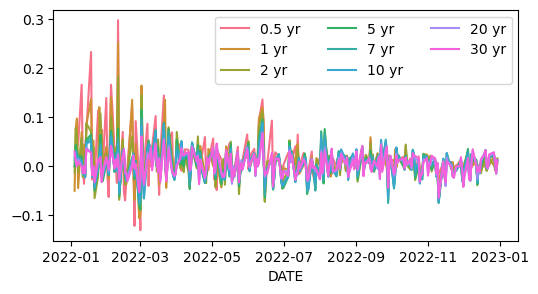

In [6]:
# 可视化收益率
fig, ax = plt.subplots(figsize = (6,3))
sns.lineplot(X_df,markers=False, 
             dashes=False,palette = "husl",ax = ax)
ax.legend(loc='upper right',ncol=3)

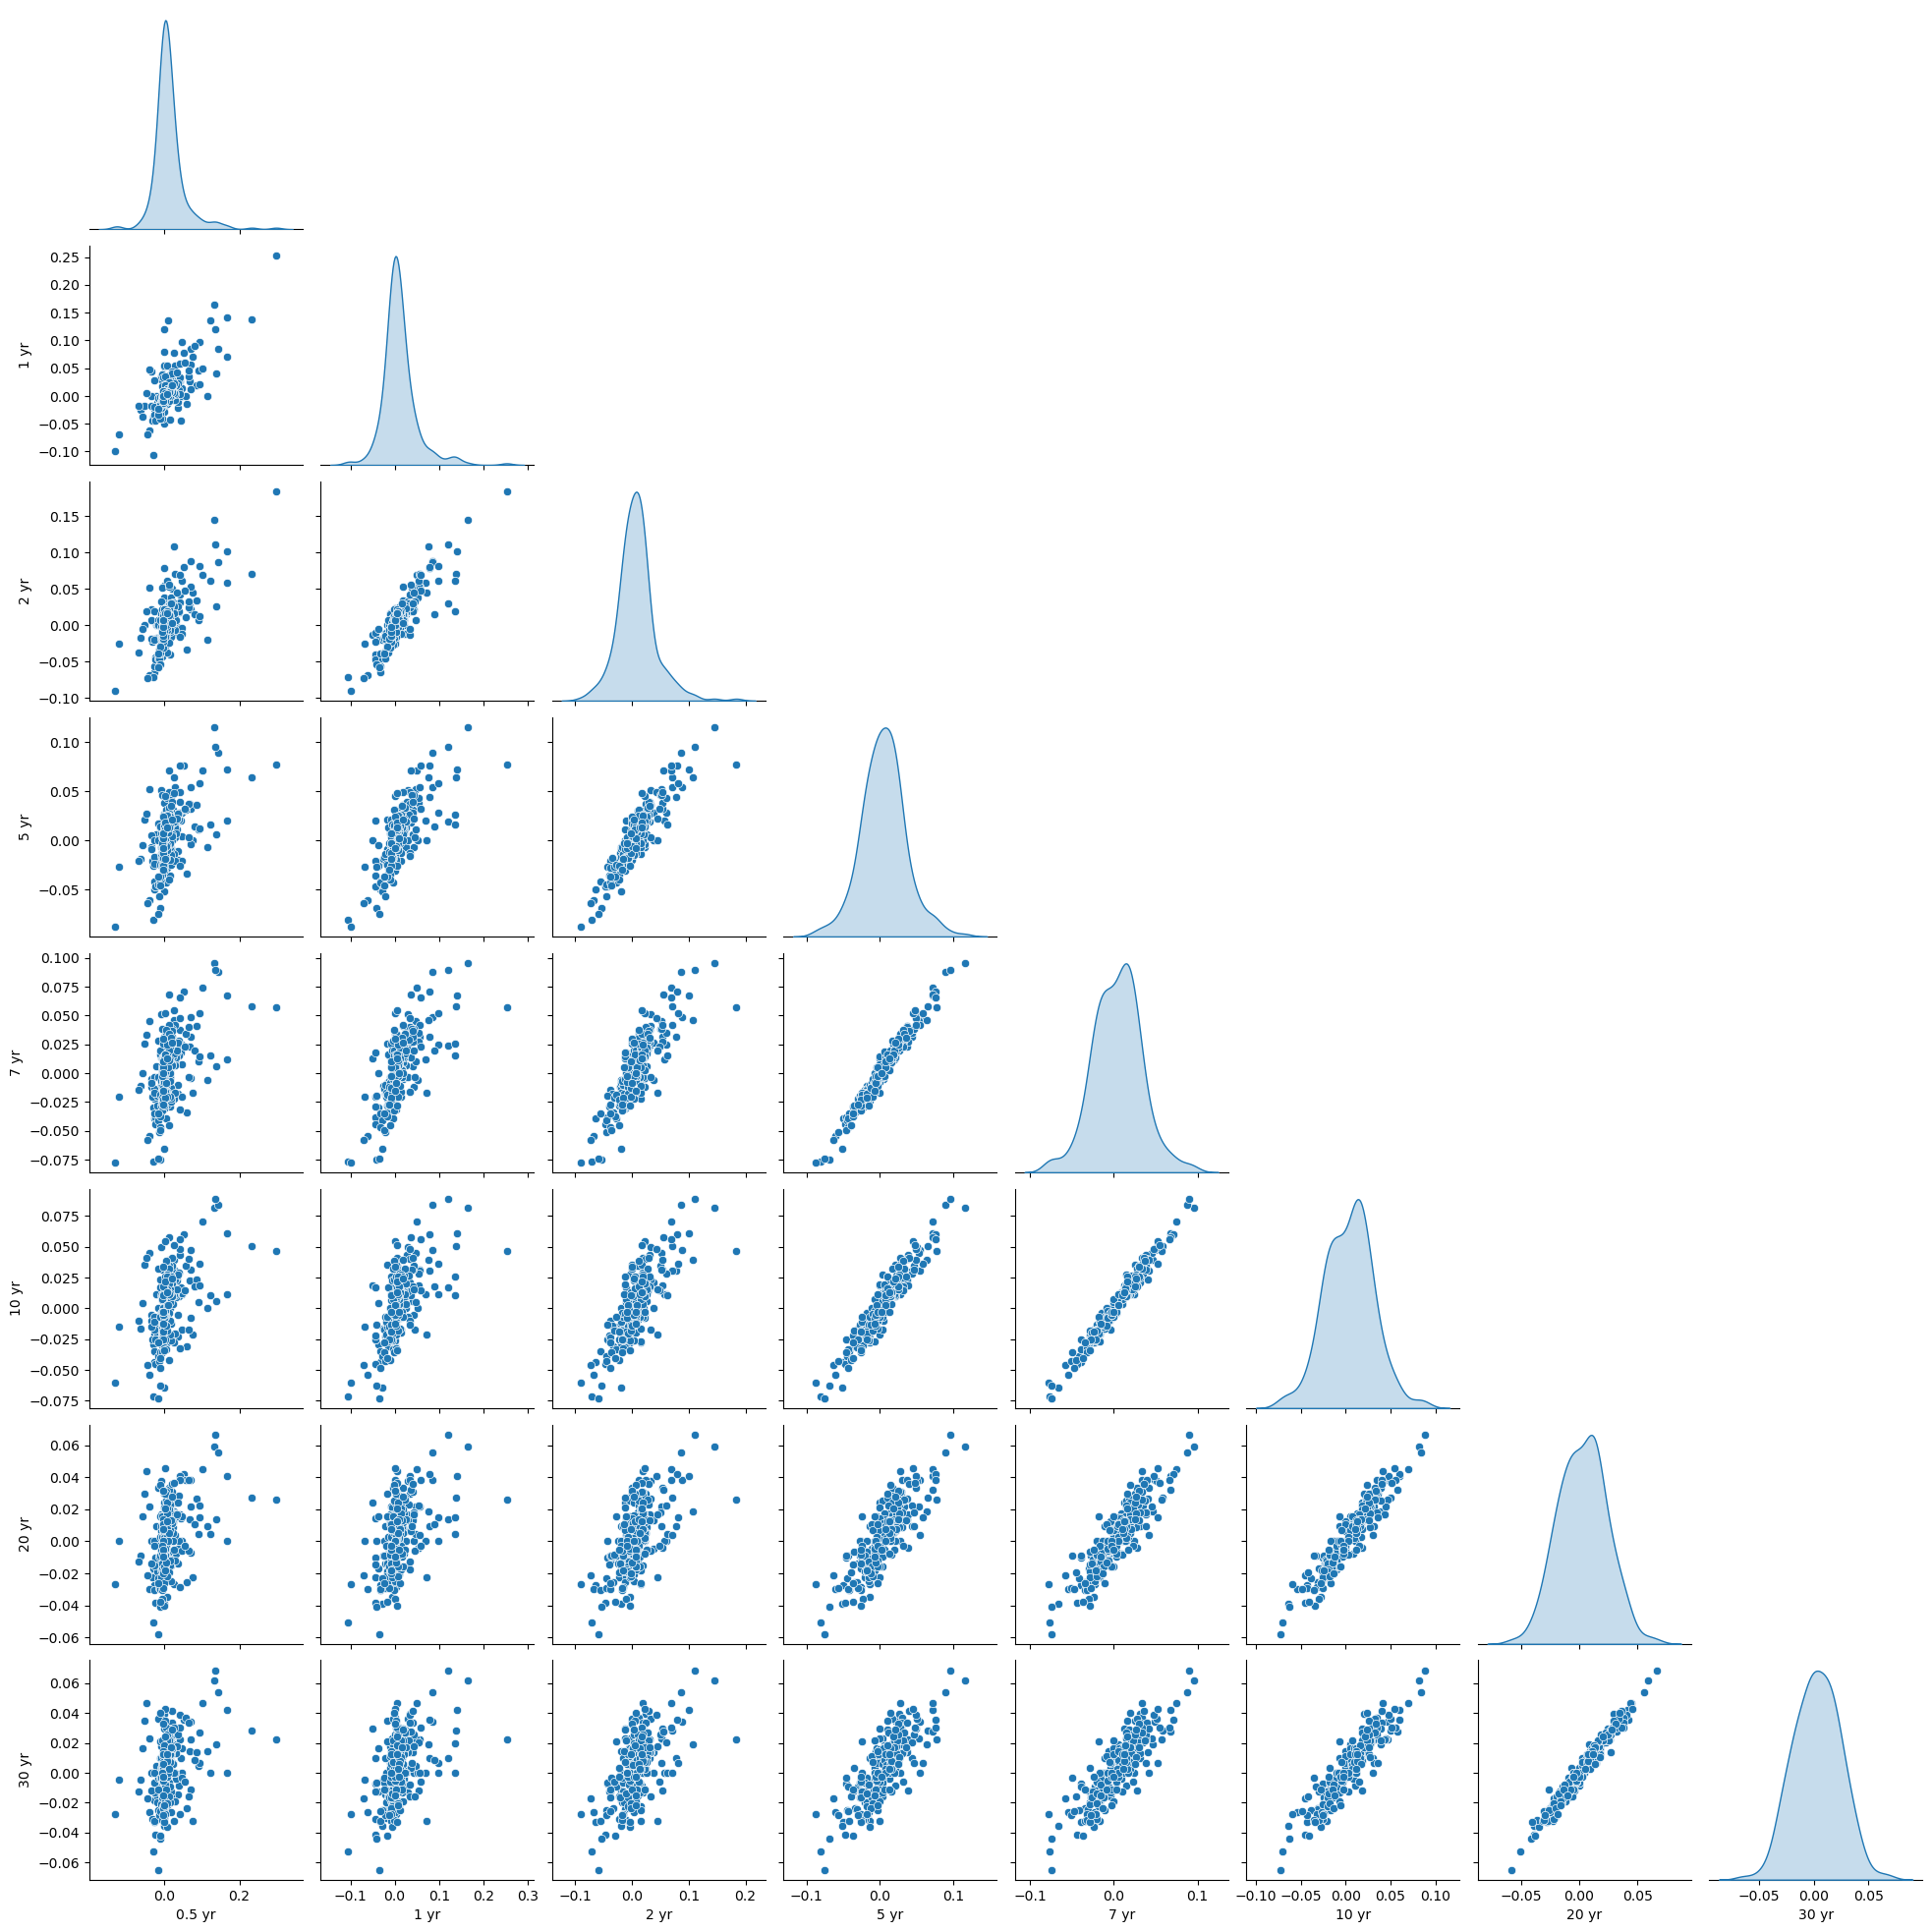

In [7]:
# 成对特征散点图
sns.pairplot(X_df, corner=True, diag_kind="kde")

In [8]:
# 相关性系数矩阵
C = X_df.corr()

<AxesSubplot:>

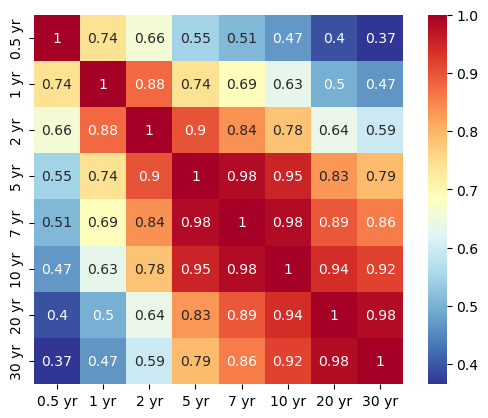

In [9]:
fig, ax = plt.subplots()
sns.heatmap(C, ax = ax, 
            annot=True,
            cmap = 'RdYlBu_r', 
            square = True)

In [10]:
# 主成分分析
pca_model = pca.PCA(X_df, standardize=True)

In [11]:
variance_V = pca_model.eigenvals 
# 计算主成分的方差解释比例

In [12]:
explained_var_ratio = variance_V / variance_V.sum()

In [13]:
PC_range = np.arange(len(variance_V)) + 1

In [14]:
labels = ['$PC_' + str(index) + '$' for index in PC_range]

(0.9, 8.1)

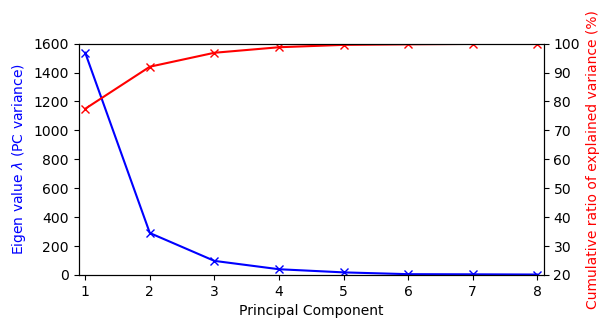

In [15]:
# 陡坡图
fig, ax1 = plt.subplots(figsize = (6,3))

ax1.plot(PC_range, variance_V, 'b', marker = 'x')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Eigen value $\lambda$ (PC variance)', color='b')
ax1.set_ylim(0,1600); ax1.set_xticks(PC_range)

ax2 = ax1.twinx()
ax2.plot(PC_range, np.cumsum(explained_var_ratio)*100, 
         'r', marker = 'x')
ax2.set_ylabel('Cumulative ratio of explained variance (%)',
               color='r')
ax2.set_ylim(20,100)
ax2.set_xlim(PC_range.min() - 0.1,PC_range.max() + 0.1)

In [16]:
# PCA载荷
loadings= pca_model.loadings[['comp_0','comp_1','comp_2']]

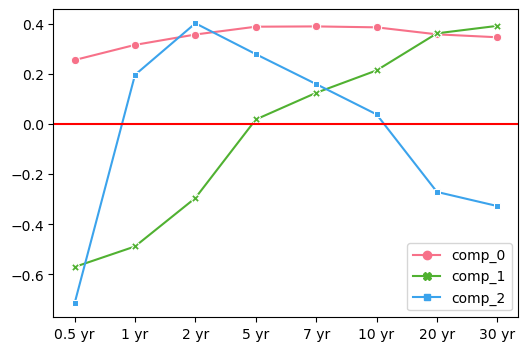

In [17]:
fig, ax = plt.subplots(figsize = (6,4))
sns.lineplot(data=loadings,
             markers=True, dashes=False, palette = "husl")
plt.axhline(y=0, color='r', linestyle='-')

In [18]:
# 用前3主成分获得还原数据
X_df_ = pca_model.project(3)

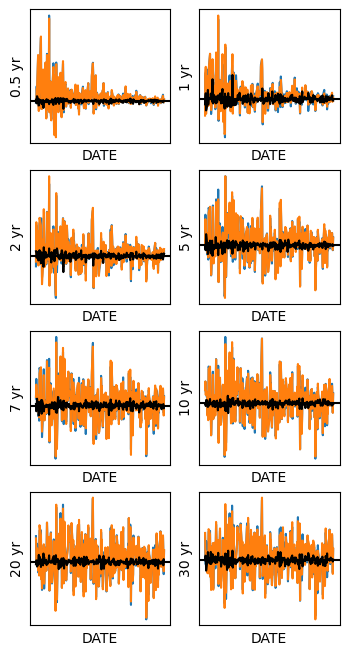

In [19]:
# 比较原始数据和还原数据
# 线图
fig, axes = plt.subplots(4,2,figsize=(4,8))
axes = axes.flatten()

for col_idx, ax_idx in zip(list(X_df_.columns),axes):
    sns.lineplot(X_df_[col_idx],ax = ax_idx)
    sns.lineplot(X_df[col_idx],ax = ax_idx) 
    sns.lineplot(X_df[col_idx] - X_df_[col_idx], 
                 c = 'k', ax = ax_idx) 
    ax_idx.set_xticks([]); ax_idx.set_yticks([])
    ax_idx.axhline(y = 0, c = 'k')

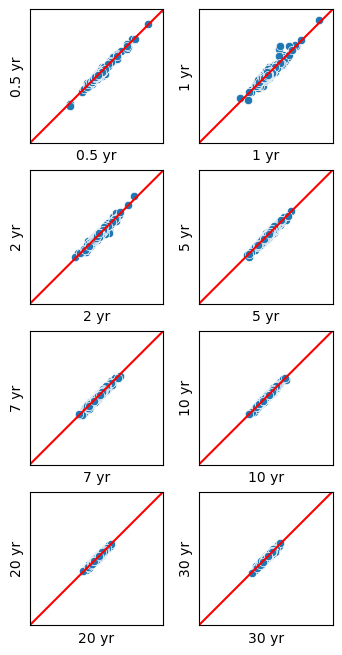

In [20]:
# 散点图
fig, axes = plt.subplots(4,2,figsize=(4,8))
axes = axes.flatten()

for col_idx, ax_idx in zip(list(X_df_.columns),axes):
    sns.scatterplot(x = X_df_[col_idx],
                    y = X_df[col_idx], 
                    ax = ax_idx)
    ax_idx.plot([-0.3, 0.3],[-0.3, 0.3],c = 'r')
    ax_idx.set_aspect('equal', adjustable='box')
    ax_idx.set_xticks([]); ax_idx.set_yticks([])
    ax_idx.set_xlim(-0.3, 0.3); ax_idx.set_ylim(-0.3, 0.3)